# Association_Rules_Books

### Prepare rules for the all the data sets 
    1) Try different values of support and confidence. Observe the change in number of rules for different support, 
    confidence values.
    2) Change the minimum length in apriori algorithm
    3) Visulize the obtained rules using different plots 


#### Data Description:

Different categories ob books in a Book stall
    
    Features:
    1.)ChildBks 2.)YouthBks 3.)CookBks 4.)DoItYBks 5.)RefBks 6.)ArtBks 7.)GeogBks 8.)ItalCook 9.)ItalAtlas 10.)ItalArt 
    11.)Florence

### Project Background

Finding association rules for different categories of books of a Book stall.

### Step-1 : Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
!pip install mlxtend
from mlxtend.frequent_patterns import apriori,association_rules
import warnings as warnings
warnings.filterwarnings("ignore")

### Step-2 : Descriptive analysis

### Step-2.1 : Working with Dataset

#### Loading the Dataset

In [2]:
# books data
books_data = pd.read_csv("book.csv")

#### Exploring the dataset

In [3]:
# Displaying first ten records
books_data.head(10)

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
5,1,0,0,0,0,1,0,0,0,0,1
6,0,1,0,0,0,0,0,0,0,0,0
7,0,1,0,0,1,0,0,0,0,0,0
8,1,0,0,1,0,0,0,0,0,0,0
9,1,1,1,0,0,0,1,0,0,0,0


In [4]:
# Shape of the data
books_data.shape

(2000, 11)

In [5]:
# Summary of the data
books_data.describe()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.423000,0.247500,0.43100,0.282000,0.214500,0.241000,0.276000,0.113500,0.037000,0.048500,0.108500
std,0.494159,0.431668,0.49534,0.450086,0.410578,0.427797,0.447129,0.317282,0.188809,0.214874,0.311089
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# Check the data types
books_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [7]:
# most popular items
count = books_data.sum().sort_values(ascending=False).rename_axis('Book_Type').reset_index(name='Sold_Counts')
count

,Book_Type,Sold_Counts
0,CookBks,862
1,ChildBks,846
2,DoItYBks,564
3,GeogBks,552
4,YouthBks,495
5,ArtBks,482
6,RefBks,429
7,ItalCook,227
8,Florence,217
9,ItalArt,97


In [8]:
for i in books_data.columns:
    print(i)
    print(books_data[i].value_counts())
    print()

ChildBks
0    1154
1     846
Name: ChildBks, dtype: int64

YouthBks
0    1505
1     495
Name: YouthBks, dtype: int64

CookBks
0    1138
1     862
Name: CookBks, dtype: int64

DoItYBks
0    1436
1     564
Name: DoItYBks, dtype: int64

RefBks
0    1571
1     429
Name: RefBks, dtype: int64

ArtBks
0    1518
1     482
Name: ArtBks, dtype: int64

GeogBks
0    1448
1     552
Name: GeogBks, dtype: int64

ItalCook
0    1773
1     227
Name: ItalCook, dtype: int64

ItalAtlas
0    1926
1      74
Name: ItalAtlas, dtype: int64

ItalArt
0    1903
1      97
Name: ItalArt, dtype: int64

Florence
0    1783
1     217
Name: Florence, dtype: int64



### Step-2.2 : Handling missing values

In [9]:
# Check for Null values
books_data.isnull().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

#### There are no missing values.

### Step-2.3 : Exploring data using Visualisation

#### Pie chart

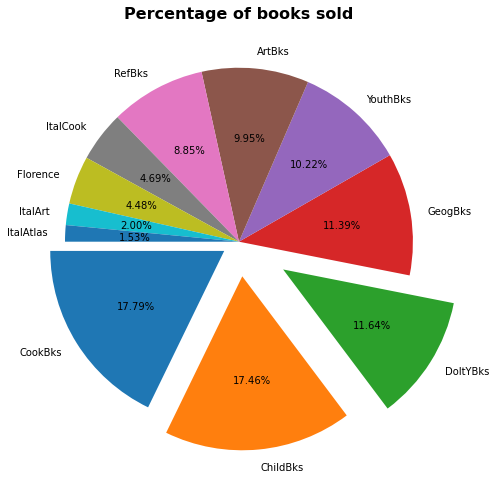

In [10]:
plt.figure(figsize=(8,8))
plt.pie(count['Sold_Counts'],labels=count['Book_Type'],autopct='%.2f%%',explode = (0.1,0.2,0.3,0,0,0,0,0,0,0,0),startangle=180)
plt.title("Percentage of books sold",fontsize=16,fontweight='bold')
plt.show()

#### Observation
+ We can clearly see that the Cook books, Child Books & DoIt books are the highest amount of books sold. So we can assume that these categories may have some association rule.

#### Bar chart

Text(0.5, 1.0, 'No. of books sold in each Category of Books')

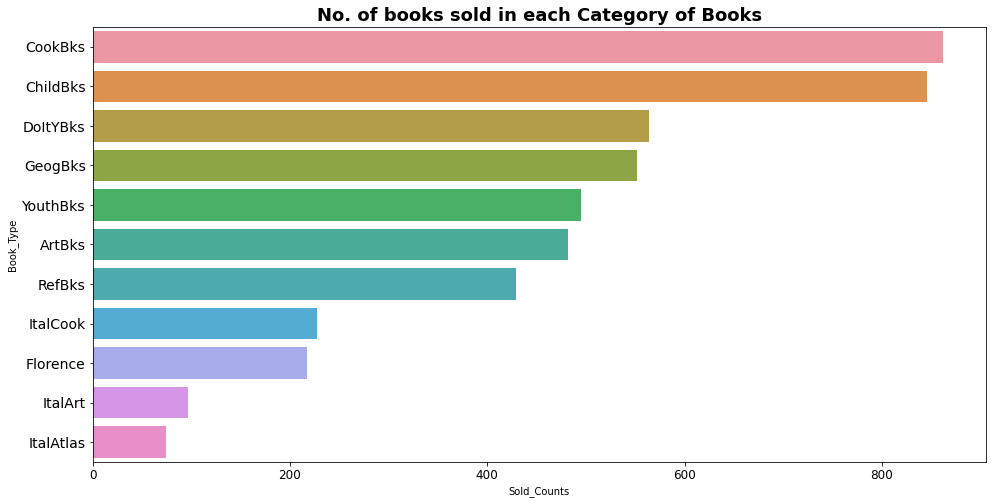

In [11]:
plt.figure(figsize = (16,8))
sb.barplot(x = 'Sold_Counts', y = 'Book_Type', data= count)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 0, fontsize = 12)
plt.title('No. of books sold in each Category of Books',  fontsize = 18, fontweight = 'bold')

### Step-3 : Creating Association rules Using Apriori Algorithm

### Step-3.1 : Considering 10% Support and 30% Confidence

In [12]:
item_sets1 = apriori(books_data, min_support=0.1, use_colnames=True)
item_sets1

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(ChildBks, YouthBks)"


In [13]:
rules_conf1 = association_rules(item_sets1, metric="confidence", min_threshold=0.3)
rules_conf1 = rules_conf1.sort_values('confidence',ascending=False)
rules_conf1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
28,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
74,"(ArtBks, DoItYBks)",(CookBks),0.1235,0.4310,0.1015,0.821862,1.906873,0.048272,3.194159
79,"(GeogBks, DoItYBks)",(CookBks),0.1325,0.4310,0.1085,0.818868,1.899926,0.051392,3.141354
84,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
50,"(ChildBks, RefBks)",(CookBks),0.1515,0.4310,0.1225,0.808581,1.876058,0.057204,2.972534
...,...,...,...,...,...,...,...,...,...
62,(ChildBks),"(GeogBks, CookBks)",0.4230,0.1925,0.1495,0.353428,1.835989,0.068072,1.248894
63,(CookBks),"(GeogBks, ChildBks)",0.4310,0.1950,0.1495,0.346868,1.778809,0.065455,1.232522
47,(ChildBks),"(DoItYBks, CookBks)",0.4230,0.1875,0.1460,0.345154,1.840820,0.066687,1.240749
49,(CookBks),"(ChildBks, DoItYBks)",0.4310,0.1840,0.1460,0.338747,1.841017,0.066696,1.234021


In [14]:
rules_lift1 = rules_conf1[rules_conf1['lift']>1]
rules_lift1 = rules_lift1.sort_values('lift',ascending=False)
rules_lift1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
28,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
71,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
72,(GeogBks),"(ChildBks, ArtBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
77,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
76,"(DoItYBks, CookBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797
...,...,...,...,...,...,...,...,...,...
5,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
12,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678
13,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069


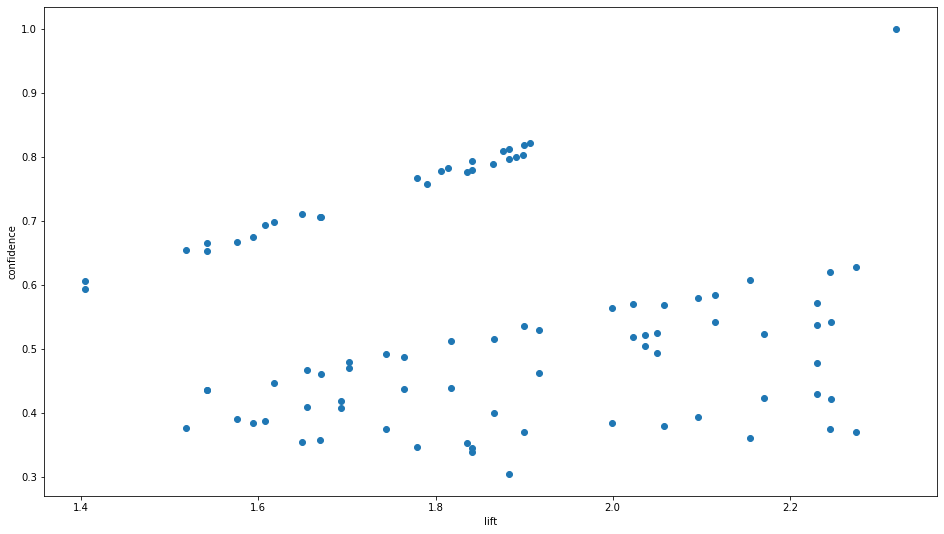

In [15]:
# Visualization of obtained rule
plt.figure(figsize=(16,9))
plt.scatter(rules_lift1['lift'],rules_lift1['confidence'])
plt.xlabel('lift')
plt.ylabel('confidence') 
plt.show()

### Step-3.2 : Considering 15% Support and 40% Confidence

In [16]:
item_sets2 = apriori(books_data, min_support=0.15, use_colnames=True)
item_sets2

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1650,"(ChildBks, YouthBks)"
8,0.2560,"(ChildBks, CookBks)"
9,0.1840,"(ChildBks, DoItYBks)"


In [17]:
rules_conf2 = association_rules(item_sets2, metric="confidence", min_threshold=0.4)
rules_conf2 = rules_conf2.sort_values('confidence',ascending=False)
rules_conf2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
12,(RefBks),(CookBks),0.2145,0.431,0.1525,0.710956,1.649549,0.060050,1.968556
7,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
5,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548
14,(GeogBks),(CookBks),0.2760,0.431,0.1925,0.697464,1.618245,0.073544,1.880766
13,(ArtBks),(CookBks),0.2410,0.431,0.1670,0.692946,1.607763,0.063129,1.853095
6,(ArtBks),(ChildBks),0.2410,0.423,0.1625,0.674274,1.594028,0.060557,1.771427
0,(YouthBks),(ChildBks),0.2475,0.423,0.1650,0.666667,1.576044,0.060308,1.731000
10,(DoItYBks),(CookBks),0.2820,0.431,0.1875,0.664894,1.542677,0.065958,1.697968
9,(YouthBks),(CookBks),0.2475,0.431,0.1620,0.654545,1.518667,0.055328,1.647105
4,(DoItYBks),(ChildBks),0.2820,0.423,0.1840,0.652482,1.542511,0.064714,1.660347


In [18]:
rules_lift2 = rules_conf2[rules_conf2['lift']>1]
rules_lift2 = rules_lift2.sort_values('lift',ascending=False)
rules_lift2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
8,(ChildBks),(GeogBks),0.4230,0.276,0.1950,0.460993,1.670264,0.078252,1.343211
7,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
5,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548
12,(RefBks),(CookBks),0.2145,0.431,0.1525,0.710956,1.649549,0.060050,1.968556
14,(GeogBks),(CookBks),0.2760,0.431,0.1925,0.697464,1.618245,0.073544,1.880766
15,(CookBks),(GeogBks),0.4310,0.276,0.1925,0.446636,1.618245,0.073544,1.308361
13,(ArtBks),(CookBks),0.2410,0.431,0.1670,0.692946,1.607763,0.063129,1.853095
6,(ArtBks),(ChildBks),0.2410,0.423,0.1625,0.674274,1.594028,0.060557,1.771427
0,(YouthBks),(ChildBks),0.2475,0.423,0.1650,0.666667,1.576044,0.060308,1.731000
10,(DoItYBks),(CookBks),0.2820,0.431,0.1875,0.664894,1.542677,0.065958,1.697968


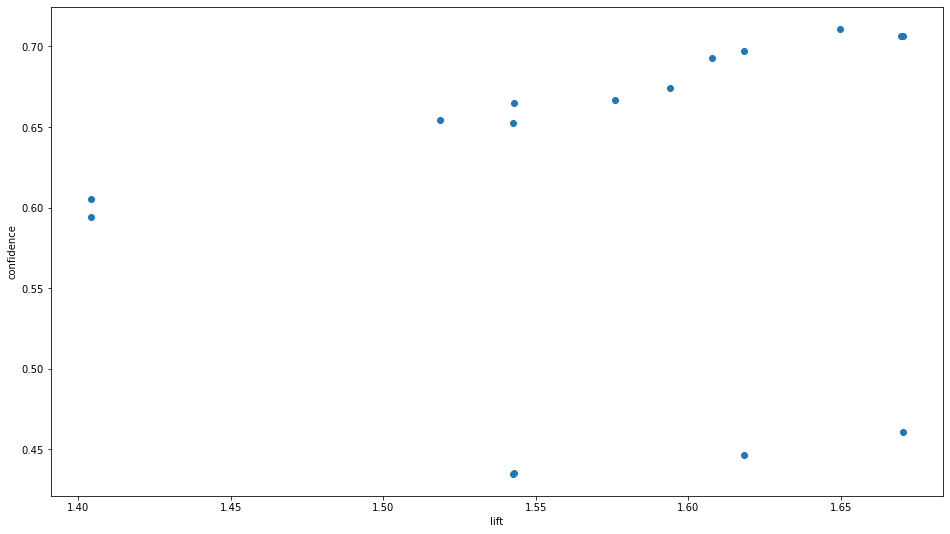

In [19]:
# visualization of obtained rule
plt.figure(figsize=(16,9))
plt.scatter(rules_lift2['lift'],rules_lift2['confidence'])
plt.xlabel('lift')
plt.ylabel('confidence') 
plt.show()

### Step-3.3 : Considering 20% Support and 60% Confidence

In [20]:
item_sets3 = apriori(books_data, min_support=0.2, use_colnames=True)
item_sets3

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.2560,"(ChildBks, CookBks)"


In [21]:
rules_conf3 = association_rules(item_sets3, metric="confidence", min_threshold=0.6)
rules_conf3 = rules_conf3.sort_values('confidence',ascending=False)
rules_conf3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.44124


In [22]:
rules_lift3 = rules_conf3[rules_conf3['lift']>1]
rules_lift3 = rules_lift3.sort_values('lift',ascending=False)
rules_lift3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.44124


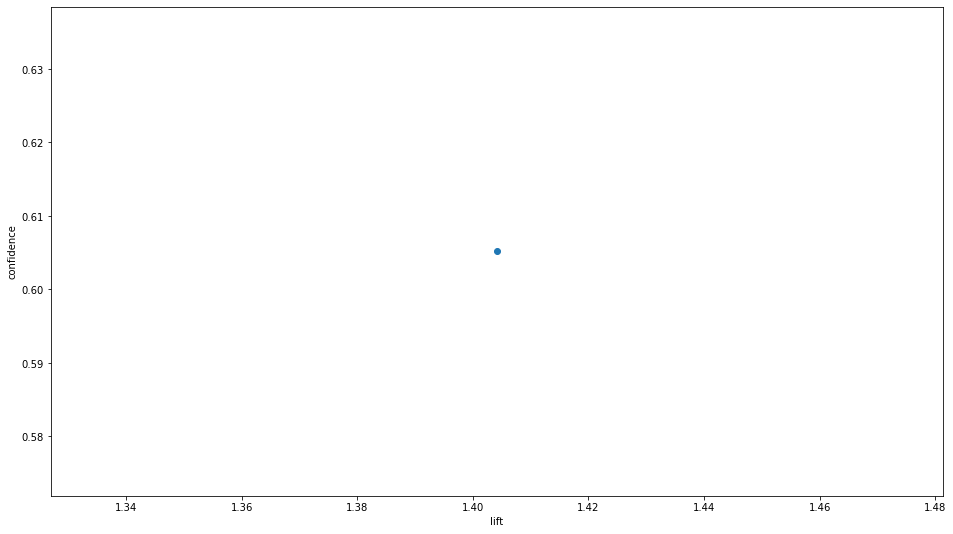

In [23]:
# visualization of obtained rule
plt.figure(figsize=(16,9))
plt.scatter(rules_lift3['lift'],rules_lift3['confidence'])
plt.xlabel('lift')
plt.ylabel('confidence') 
plt.show()

### Step-4 : Conclusion

In [24]:
print("For 10% Support and 30% Confidence, No. of Association Rules = ",rules_lift1.shape[0])
print("For 15% Support and 40% Confidence, No. of Association Rules = ",rules_lift2.shape[0])
print("For 20% Support and 60% Confidence, No. of Association Rules = ",rules_lift3.shape[0])

For 10% Support and 30% Confidence, No. of Association Rules =  89
For 15% Support and 40% Confidence, No. of Association Rules =  16
For 20% Support and 60% Confidence, No. of Association Rules =  1


#### For 20% Support and 60% Confidence, the top association rule obtained is Antecedent = Child Book, Consequent = Cook Book